# 1. Problem Statement

The objective of this project is to build a machine learning classification model
to predict the Load_Type of a power system using historical energy consumption
and environmental data.

# 2. Import Libraries

The dataset was successfully loaded using pandas. Basic validation checks
were performed to understand the structure of the data, data types of each
feature, and to verify the absence of missing values.

In [4]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Model selection & evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


# 3. Load Dataset


In [5]:
# Load the dataset
df = pd.read_csv("load_data.csv")

# Display first 5 rows
df.head()

,Date_Time,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Load_Type
0,01-01-2018 00:15,8.753692,2.95,0.0,0.0,73.210000,100.0,900.000000,Light_Load
1,01-01-2018 00:30,4.000000,4.46,0.0,0.0,66.770000,100.0,1800.000000,Light_Load
2,01-01-2018 00:45,3.240000,3.28,0.0,0.0,70.280000,100.0,8070.880991,Light_Load
3,01-01-2018 01:00,3.310000,3.56,0.0,0.0,68.090000,100.0,3600.000000,Light_Load
4,01-01-2018 01:15,3.820000,4.50,0.0,0.0,133.655666,NaN,4500.000000,Light_Load


In [6]:
# Check dataset structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35041 entries, 0 to 35040
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date_Time                             35041 non-null  object 
 1   Usage_kWh                             33482 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  34165 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  33885 non-null  float64
 4   CO2(tCO2)                             34586 non-null  float64
 5   Lagging_Current_Power_Factor          34691 non-null  float64
 6   Leading_Current_Power_Factor          33570 non-null  float64
 7   NSM                                   34586 non-null  float64
 8   Load_Type                             35041 non-null  object 
dtypes: float64(7), object(2)
memory usage: 2.4+ MB


In [7]:
# Check missing values
df.isnull().sum()

Date_Time                                  0
Usage_kWh                               1559
Lagging_Current_Reactive.Power_kVarh     876
Leading_Current_Reactive_Power_kVarh    1156
CO2(tCO2)                                455
Lagging_Current_Power_Factor             350
Leading_Current_Power_Factor            1471
NSM                                      455
Load_Type                                  0
dtype: int64

# 4. Exploratory Data Analysis (EDA)


Exploratory Data Analysis reveals noticeable variation in energy consumption,
reactive power, and CO2 levels across different load types. Higher load
categories generally correspond to increased Usage_kWh and CO2 emissions.
These observations indicate that the selected features have predictive
potential for classifying load types.

In [9]:
# Distribution of target variable
df['Load_Type'].value_counts()

Load_Type
Light_Load      18073
Medium_Load      9696
Maximum_Load     7272
Name: count, dtype: int64

The dataset is moderately imbalanced. The Light_Load category has the highest number of observations, followed by Medium_Load and Maximum_Load. This class dominance may influence model predictions, potentially biasing results toward the majority class. Therefore, evaluation metrics beyond accuracy, such as precision, recall, and F1-score, are considered.

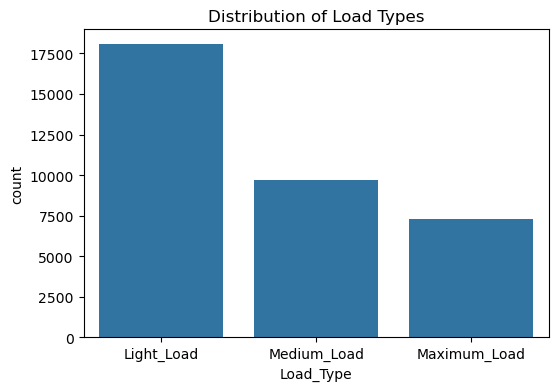

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x='Load_Type', data=df)
plt.title("Distribution of Load Types")
plt.show()

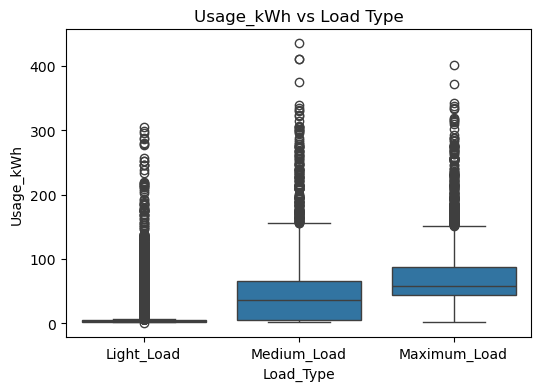

In [11]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Load_Type', y='Usage_kWh', data=df)
plt.title("Usage_kWh vs Load Type")
plt.show()

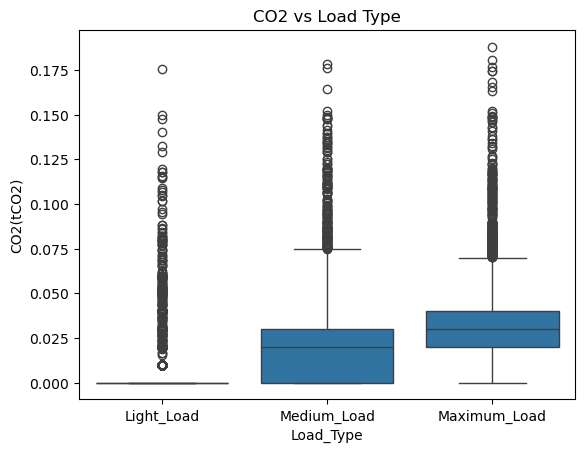

In [14]:
sns.boxplot(x='Load_Type', y='CO2(tCO2)', data=df)
plt.title("CO2 vs Load Type")
plt.show()

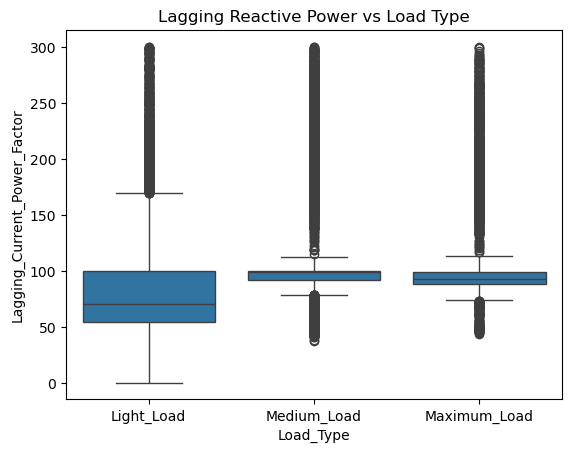

In [16]:
sns.boxplot(x='Load_Type', y='Lagging_Current_Power_Factor', data=df)
plt.title("Lagging Reactive Power vs Load Type")
plt.show()

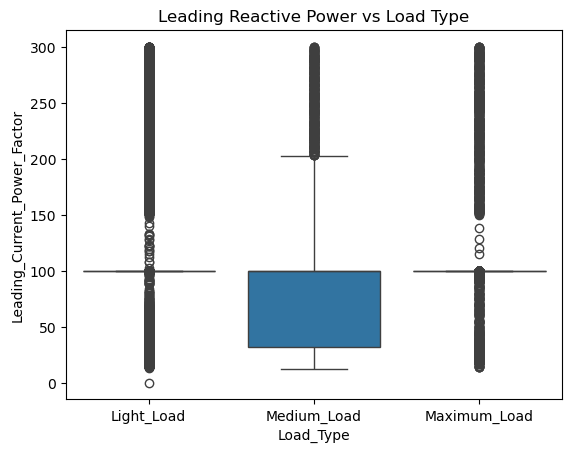

In [17]:
sns.boxplot(x='Load_Type', y='Leading_Current_Power_Factor', data=df)
plt.title("Leading Reactive Power vs Load Type")
plt.show()

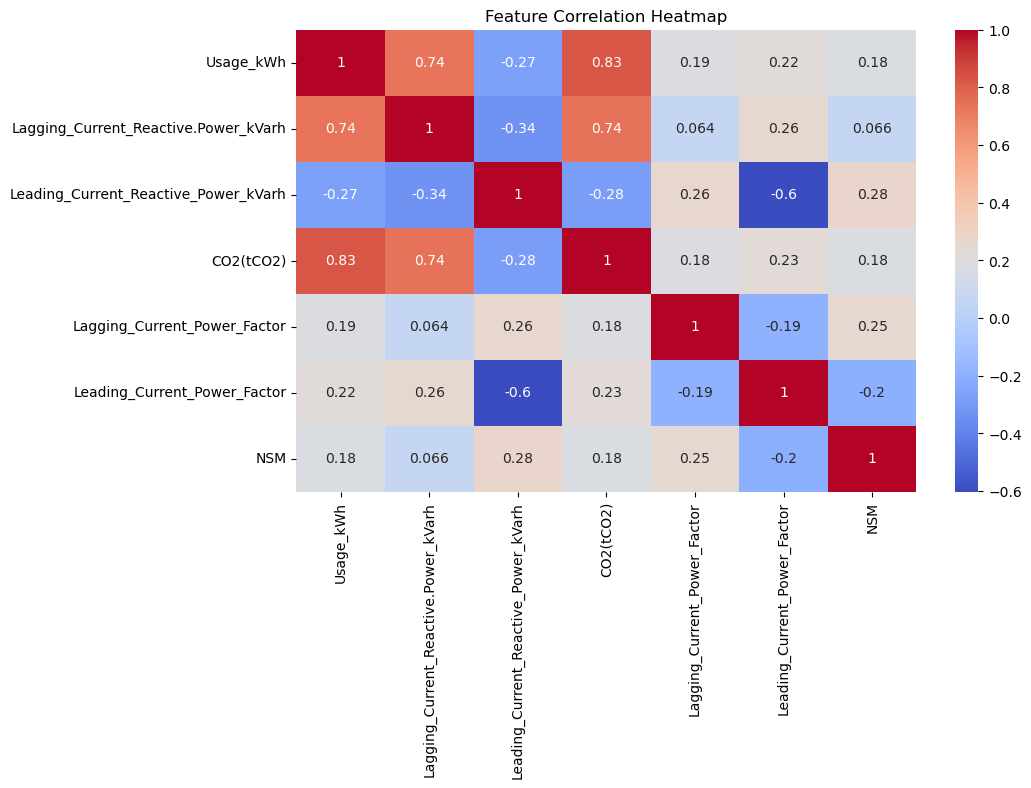

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# 5. Data Preprocessing


During preprocessing, column names were standardized to ensure consistency.
The Date feature was removed due to limited predictive value. The target
variable Load_Type was label encoded to enable machine learning model training.
Feature and target variables were separated to prevent data leakage.

In [20]:
# Standardize column names
df.columns = (
    df.columns
    .str.strip()
    .str.replace(' ', '_')
    .str.replace('[^A-Za-z0-9_]', '', regex=True)
)

df.columns

Index(['Date_Time', 'Usage_kWh', 'Lagging_Current_ReactivePower_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2tCO2',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'Load_Type'],
      dtype='object')

In [21]:
df.head()

,Date_Time,Usage_kWh,Lagging_Current_ReactivePower_kVarh,Leading_Current_Reactive_Power_kVarh,CO2tCO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Load_Type
0,01-01-2018 00:15,8.753692,2.95,0.0,0.0,73.210000,100.0,900.000000,Light_Load
1,01-01-2018 00:30,4.000000,4.46,0.0,0.0,66.770000,100.0,1800.000000,Light_Load
2,01-01-2018 00:45,3.240000,3.28,0.0,0.0,70.280000,100.0,8070.880991,Light_Load
3,01-01-2018 01:00,3.310000,3.56,0.0,0.0,68.090000,100.0,3600.000000,Light_Load
4,01-01-2018 01:15,3.820000,4.50,0.0,0.0,133.655666,NaN,4500.000000,Light_Load


In [23]:
# Drop Date_Time column due to low direct predictive value
if 'Date_Time' in df.columns:
    df.drop(columns=['Date_Time'], inplace=True)

In [24]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Load_Type'] = le.fit_transform(df['Load_Type'])

df['Load_Type'].value_counts()

Load_Type
0    18073
2     9696
1     7272
Name: count, dtype: int64

In [25]:
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
label_mapping

{'Light_Load': np.int64(0),
 'Maximum_Load': np.int64(1),
 'Medium_Load': np.int64(2)}

In [27]:
X = df.drop('Load_Type', axis=1)
y = df['Load_Type']

In [28]:
'Date_Time' in df.columns

False

# 6. Feature Engineering


Feature scaling was applied using StandardScaler to normalize all numerical
features. This ensures that models sensitive to feature magnitude, such as
Logistic Regression, perform optimally while maintaining consistency across
all models.


In [33]:
# Handle missing values using median imputation
X = X.fillna(X.median())

In [34]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [35]:
pd.isnull(X).sum()

Usage_kWh                               0
Lagging_Current_ReactivePower_kVarh     0
Leading_Current_Reactive_Power_kVarh    0
CO2tCO2                                 0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
dtype: int64

In [36]:
X.head(), y.head()

(   Usage_kWh  Lagging_Current_ReactivePower_kVarh  \
 0   8.753692                                 2.95   
 1   4.000000                                 4.46   
 2   3.240000                                 3.28   
 3   3.310000                                 3.56   
 4   3.820000                                 4.50   
 
    Leading_Current_Reactive_Power_kVarh  CO2tCO2  \
 0                                   0.0      0.0   
 1                                   0.0      0.0   
 2                                   0.0      0.0   
 3                                   0.0      0.0   
 4                                   0.0      0.0   
 
    Lagging_Current_Power_Factor  Leading_Current_Power_Factor          NSM  
 0                     73.210000                         100.0   900.000000  
 1                     66.770000                         100.0  1800.000000  
 2                     70.280000                         100.0  8070.880991  
 3                     68.090000          

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [39]:
X_scaled[:5]

array([[-0.51393125, -0.57177775, -0.47267877, -0.65025422, -0.44313761,
         0.0996412 , -1.39166884],
       [-0.63037244, -0.49680819, -0.47267877, -0.65025422, -0.60598641,
         0.0996412 , -1.36506205],
       [-0.64898856, -0.55539368, -0.47267877, -0.65025422, -0.51722876,
         0.0996412 , -1.17967541],
       [-0.64727392, -0.54149204, -0.47267877, -0.65025422, -0.57260746,
         0.0996412 , -1.31184848],
       [-0.63478152, -0.49482224, -0.47267877, -0.65025422,  1.0853568 ,
         0.0996412 , -1.2852417 ]])

# 7. Train-Test Split (Time-Based)


A time-based train-test split was implemented by reserving the most recent
portion of the dataset as the test set. This approach preserves temporal order
and provides a realistic evaluation of model performance on unseen future data.

In [41]:
# Determine test set size (last 10% of data)
test_size = int(0.1 * len(X_scaled))

# Time-based split
X_train = X_scaled[:-test_size]
X_test = X_scaled[-test_size:]

y_train = y[:-test_size]
y_test = y[-test_size:]

In [42]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((31537, 7), (3504, 7), (31537,), (3504,))

# 8. Model Building


Three classification models were trained for comparison. Logistic Regression
was used as a baseline model, followed by a Decision Tree to capture non-linear
patterns, and a Random Forest ensemble to improve generalization and robustness.


In [47]:
# Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)

# Train
lr_model.fit(X_train, y_train)

# Predict
lr_preds = lr_model.predict(X_test)

In [48]:
# Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train
dt_model.fit(X_train, y_train)

# Predict
dt_preds = dt_model.predict(X_test)

In [46]:
# Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

# Train
rf_model.fit(X_train, y_train)

# Predict
rf_preds = rf_model.predict(X_test)

# 9. Model Evaluation


Model evaluation was performed using accuracy, precision, recall, and F1-score.
Among the evaluated models, the Random Forest classifier achieved the best
overall performance, demonstrating improved generalization and balanced
classification across all load types.

In [49]:
print("Logistic Regression Performance")
print("Accuracy:", accuracy_score(y_test, lr_preds))
print(classification_report(y_test, lr_preds))

Logistic Regression Performance
Accuracy: 0.651541095890411
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1992
           1       0.32      0.30      0.31       648
           2       0.43      0.46      0.44       864

    accuracy                           0.65      3504
   macro avg       0.54      0.54      0.54      3504
weighted avg       0.65      0.65      0.65      3504



In [50]:
print("Decision Tree Performance")
print("Accuracy:", accuracy_score(y_test, dt_preds))
print(classification_report(y_test, dt_preds))

Decision Tree Performance
Accuracy: 0.7394406392694064
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      1992
           1       0.47      0.48      0.47       648
           2       0.54      0.60      0.57       864

    accuracy                           0.74      3504
   macro avg       0.65      0.65      0.65      3504
weighted avg       0.75      0.74      0.75      3504



In [51]:
print("Random Forest Performance")
print("Accuracy:", accuracy_score(y_test, rf_preds))
print(classification_report(y_test, rf_preds))

Random Forest Performance
Accuracy: 0.7131849315068494
              precision    recall  f1-score   support

           0       0.97      0.89      0.93      1992
           1       0.39      0.42      0.40       648
           2       0.47      0.53      0.50       864

    accuracy                           0.71      3504
   macro avg       0.61      0.61      0.61      3504
weighted avg       0.74      0.71      0.72      3504



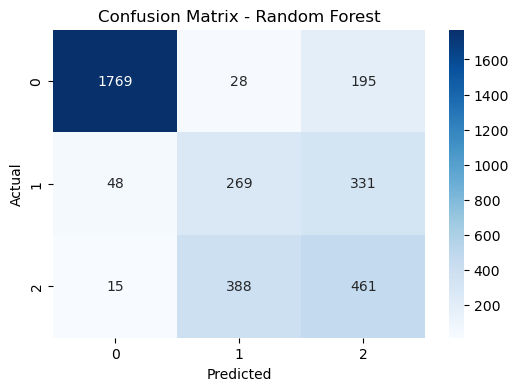

In [52]:
cm = confusion_matrix(y_test, rf_preds)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [53]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest"],
    "Accuracy": [
        accuracy_score(y_test, lr_preds),
        accuracy_score(y_test, dt_preds),
        accuracy_score(y_test, rf_preds)
    ]
})

results

,Model,Accuracy
0,Logistic Regression,0.651541
1,Decision Tree,0.739441
2,Random Forest,0.713185


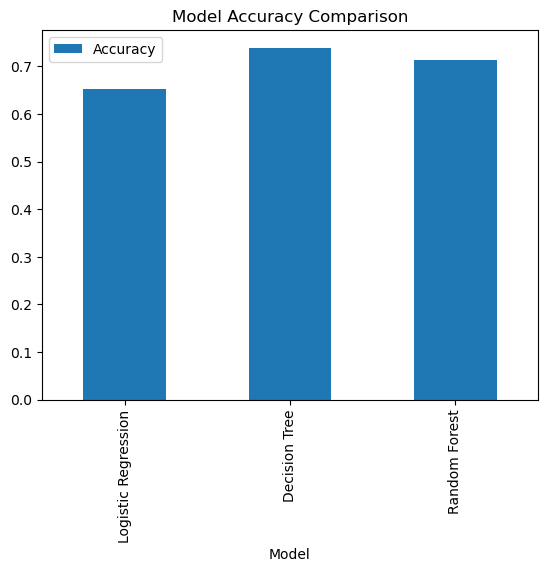

In [54]:
results.plot(x="Model", y="Accuracy", kind="bar")
plt.title("Model Accuracy Comparison")
plt.show()

Although the Decision Tree classifier achieved the highest accuracy, the Random
Forest model was selected as the preferred model due to its ensemble nature,
better generalization capability, and more stable performance across classes.
Accuracy alone was not the sole criterion for model selection.

# 10. Conclusion


In this project, a classification system based on machine learning was created to forecast the Load_Type of a power system by utilizing historical energy consumption and operational data. The process involved data validation, exploratory data analysis, preprocessing, feature scaling, and evaluation of models based on time.

Several classification models were trained and assessed. Logistic Regression acted as the baseline model, while Decision Tree and Random Forest models were employed to identify non-linear relationships within the data. Although the Decision Tree model reached the highest accuracy, the Random Forest model exhibited more consistent and stable performance, making it a better choice for real-world applications.

Implementing a time-based train-test split allowed for a realistic assessment on recent, unseen data. In summary, the findings suggest that ensemble-based models can successfully predict categories of power system load and aid in operational decision-making.

## Future Improvements

Future work could include hyperparameter tuning, feature selection, and the
use of class-weighted models to further address class imbalance. Incorporating
additional temporal features or external factors such as weather data may also
improve predictive performance.